Reading the data 

In [90]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd

data = pd.read_csv('data/poly_mo/quant_bootstraps.tsv', header=0, sep='\t')

truth = pd.read_csv('data/poly_mo/poly_truth.tsv', header=0, index_col=0, sep='\t')

quant = pd.read_csv('data/poly_mo/quant.sf', header=0, index_col=0, sep='\t')

Computing basic statistics for each transcript

In [91]:
data_mins = data.min()
data_maxs = data.max()
data_means = data.mean()
data_std = data.std()

data = data.transpose()

data['min'] = data_mins
data['max'] = data_maxs
data['mean'] = data_means
data['std'] = data_std

Merging with ground truth

In [92]:
data['truth'] = truth

bootstrap_data = data

data = data[~data['truth'].isnull()]

Filtering out erroneous transcripts - defining erroneous, for now, as transcripts for which ground truth count lies outside min max range of counts from bootstrap experiments. 

TODO: Change this later to define erroneous transcripts as those falling outside 95% confidence interval

In [93]:
data['erroneous'] = data.apply(
    lambda x: (x['truth'] < x['min']) or (x['max'] < x['truth']), axis=1)

# result = data_w_truth.apply(
# 	lambda x: ((x['mean']-(1*x['std'])) < x['truth'] ) and (x['truth'] < (x['mean']+(1*x['std']))), axis=1)

Percentage of rows that are erroneous:

In [94]:
print "Percentage of erroneous rows: %s" % \
    (float(sum(data['erroneous'])*100)/data.shape[0])

Percentage of erroneous rows: 41.3105730968


Assigning properties available in quant.sf file to transcripts:

In [95]:
data['Length'] = quant['Length']
data['EffectiveLength'] = quant['EffectiveLength']
data['TPM'] = quant['TPM']
data['NumReads'] = quant['NumReads']

In [97]:
from math import log

from matplotlib import pyplot as plt, rc

%matplotlib inline

Comparing distributions of properties of erroneous transcripts with non-erroneous ones

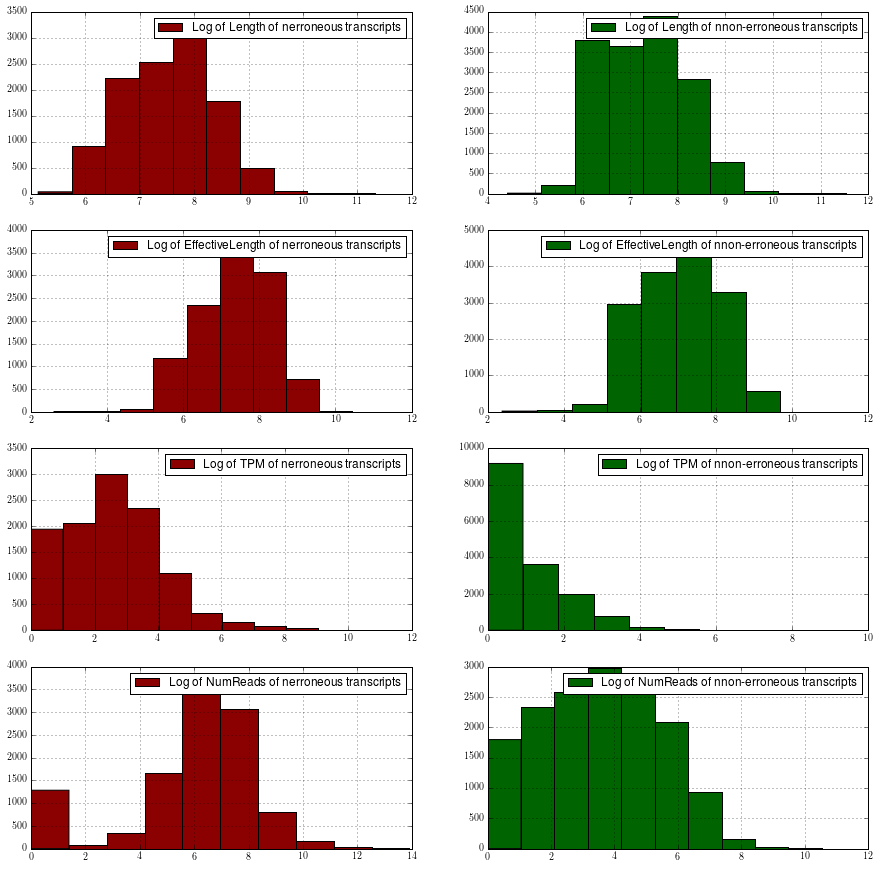

In [100]:
fig, axs = plt.subplots(4,2)
fig.set_size_inches(15,15)

properties = ['Length', 'EffectiveLength', 'TPM', 'NumReads']

for i, prop in enumerate(properties):
    ax1 = data[data['erroneous']][prop].apply(lambda x: log(x+1)).hist(ax=axs[i][0], color='darkred')
    ax1.legend(['Log of %s of erroneous transcripts' % prop])

    ax = data[~data['erroneous']][prop].apply(lambda x: log(x+1)).hist(ax=axs[i][1], color='darkgreen')
    ax.legend(['Log of %s of non-erroneous transcripts' % prop])